1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

0

In [7]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values for each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# checking statistical information
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- All the above data, the means are very close to each other - between 66 and 68.05.
- All the standard deviations are also close - 14.6 to 15.19.
- The minimum score for math is 0, for writing it is 10 and for reading is the highest == 17.

Exploring Data

In [10]:
print('Categories in gender variable:  ',end='')
print(df['gender'].unique())

print('Categories in race/ethnicity variable:  ',end='')
print(df['race_ethnicity'].unique())    

print('Categories in parental level of education variable:  ',end='')
print(df['parental_level_of_education'].unique())

print('Categories in lunch variable:  ',end='')
print(df['lunch'].unique())

print('Categories in test preparation course variable:  ',end='')
print(df['test_preparation_course'].unique())


Categories in gender variable:  ['female' 'male']
Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [11]:
# defining numerical and categorical features

numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

categorical_features = [features for features in df.columns if df[features].dtypes == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding Columns for Total Score and Average

In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_score=df[df['writing_score']==100]['average_score'].count()
math_score=df[df['math_score']==100]['average_score'].count()

print(f'Number of students who got full marks in reading: {reading_full}')
print(f'Number of students who got full marks in writing: {writing_score}')
print(f'Number of students who got full marks in math: {math_score}')


Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [14]:
reading_score_less_20=df[df['reading_score']<=20]['average_score'].count()
writing_score_less_20=df[df['writing_score']<=20]['average_score'].count()
math_score_less_20=df[df['math_score']<=20]['average_score'].count()

print(f'Number of students who got less than 20 marks in reading: {reading_score_less_20}')
print(f'Number of students who got less than 20 marks in writing: {writing_score_less_20}')
print(f'Number of students who got less than 20 marks in math: {math_score_less_20}')


Number of students who got less than 20 marks in reading: 1
Number of students who got less than 20 marks in writing: 3
Number of students who got less than 20 marks in math: 4


From the above results, we can say that the students have performed worst in Maths

Data Visualization

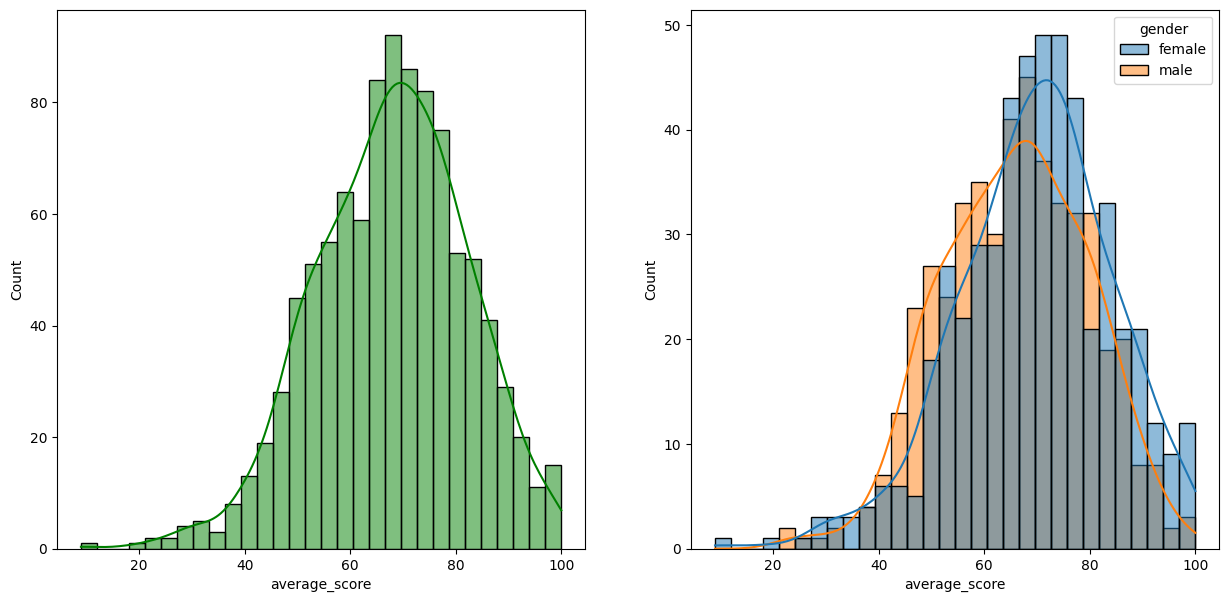

In [15]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')
plt.show()

Female students tend to perform well 

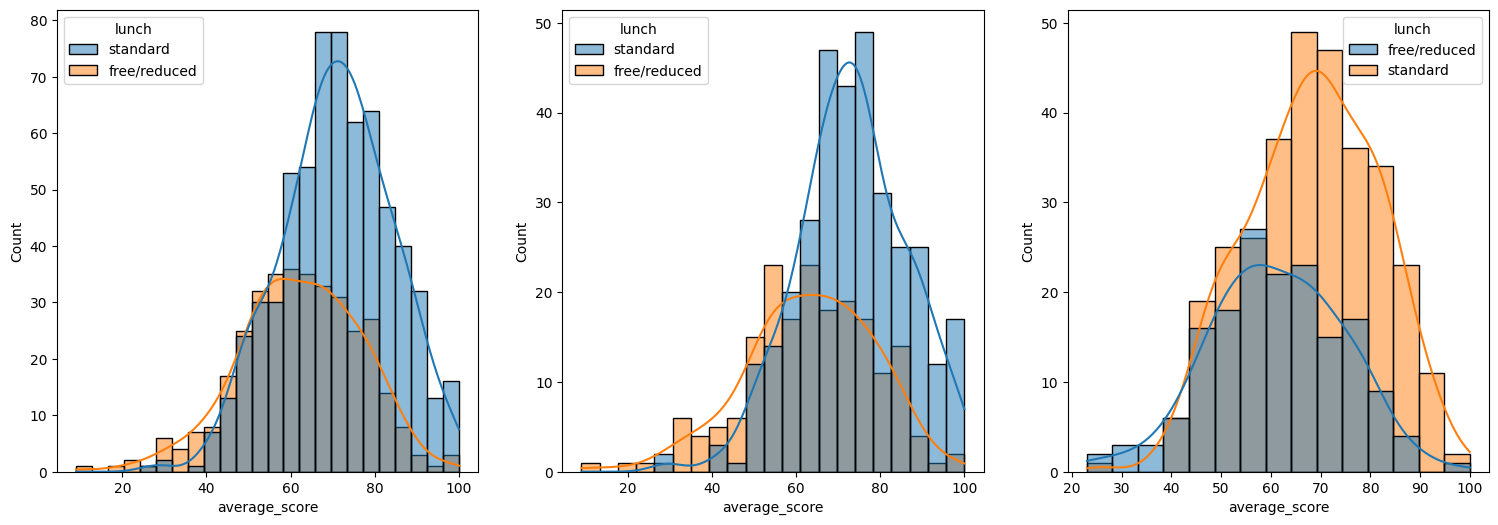

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

- Standard lunch helps to perform well in an exam irrespective of the gender


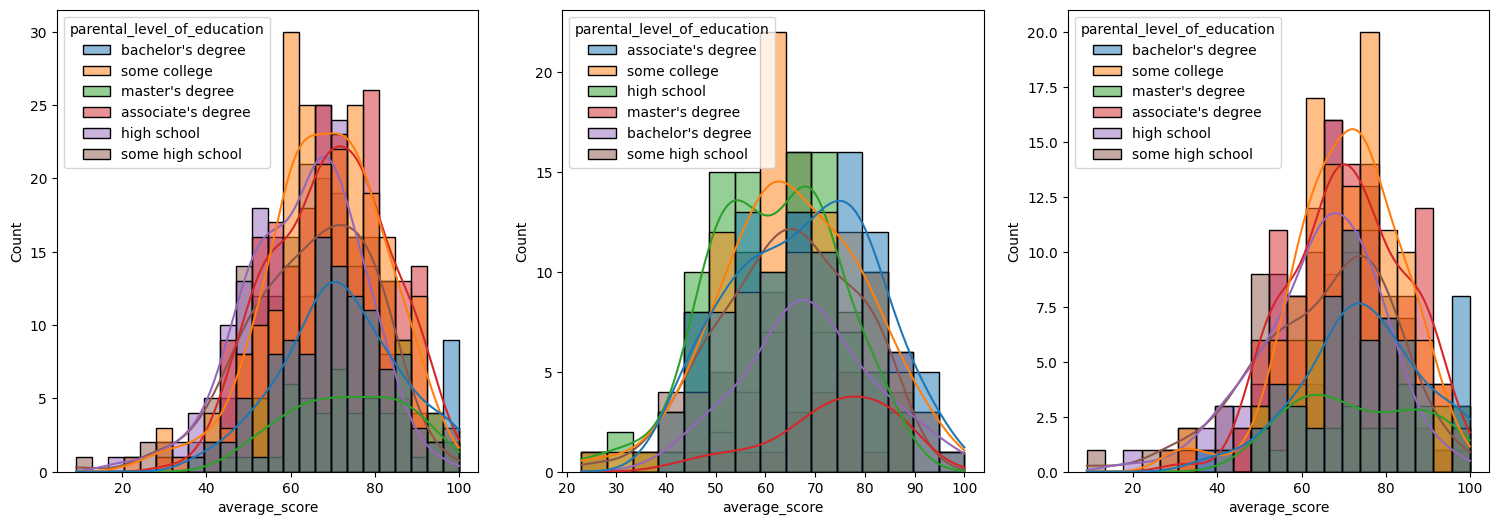

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')  
plt.show()

- In general parent's education don't help a student to perform well in an exam.
- 2nd plot shows that parent's whose education is of associate's degree or a master's degree their male child tend to perform well in an exam.
- 3rd plot shows that there is no effect of parental education on a female child.

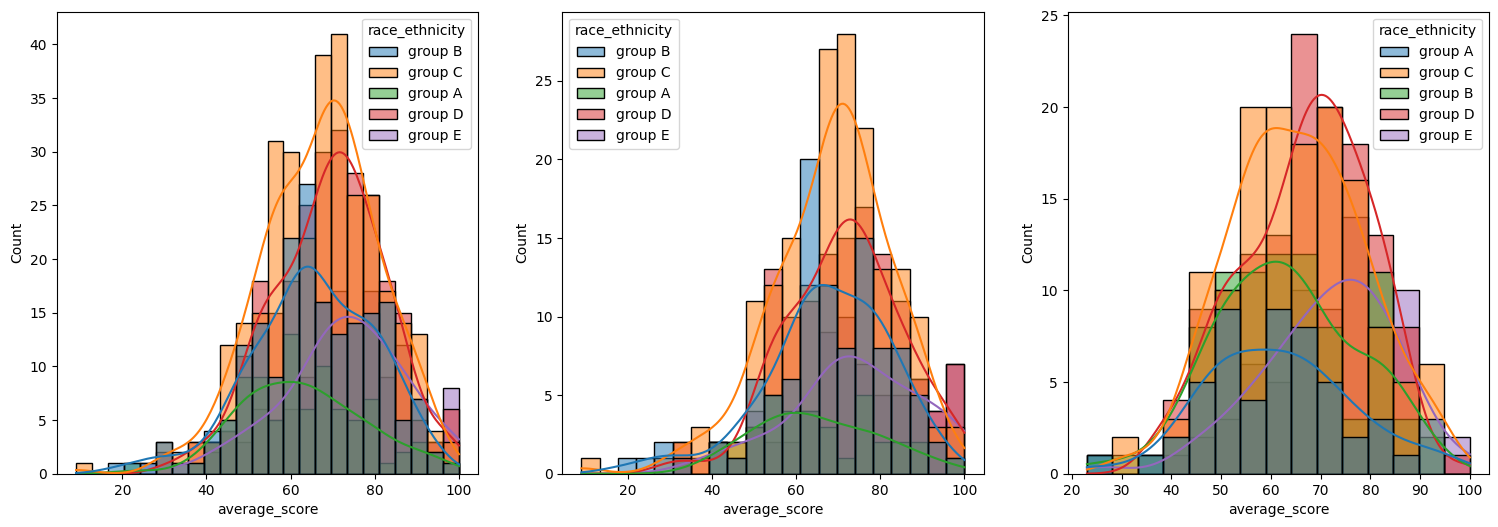

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')   
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')   
plt.show()

- Students of group A and B tend to peform poorly in an exam irrespective of the gender.

Maximum Score of students in all the three subjects.

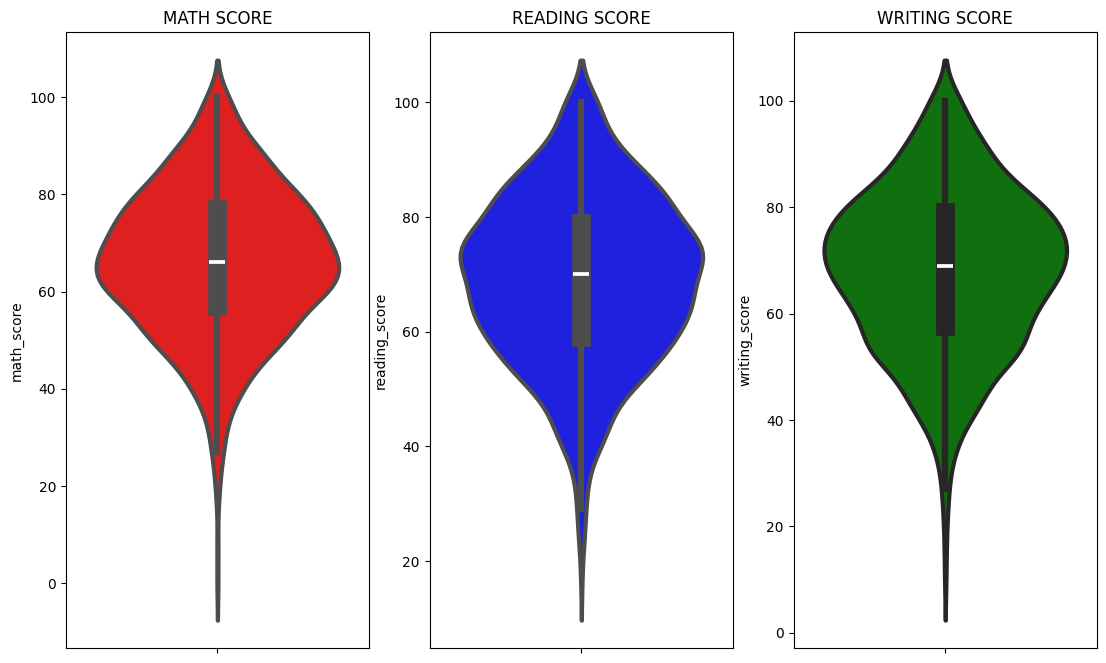

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()

- From the above graphs we can conclude that most of the students have scored in between 60-80 in Maths.
- The students have scored in the range of 50-80 in Reading.

Multivariate Analysis 

(-1.25, 1.25, -1.25, 1.25)

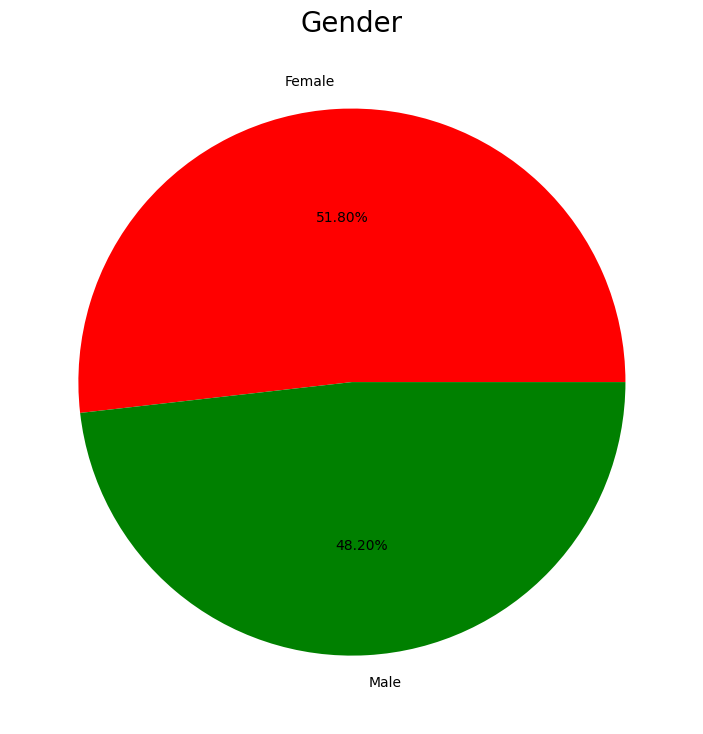

In [20]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,3,1)

size=df['gender'].value_counts()
labels='Female', 'Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%0.02f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

- The proportion of Male and Female Students are almost equal

(-1.25, 1.25, -1.25, 1.25)

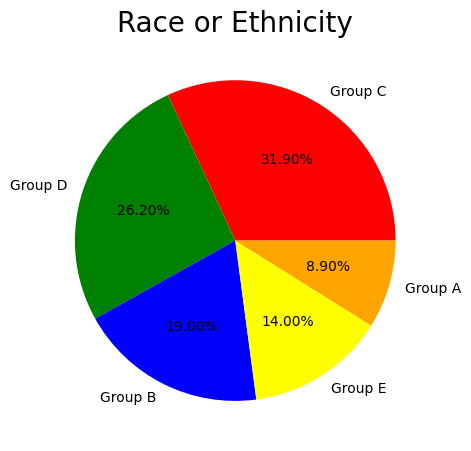

In [21]:
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','yellow','orange']

plt.pie(size,colors=color,labels=labels,autopct='%0.02f%%')
plt.title('Race or Ethnicity',fontsize=20)
plt.axis('off')

- Number of students are greatest in group C

(-1.25, 1.25, -1.25, 1.25)

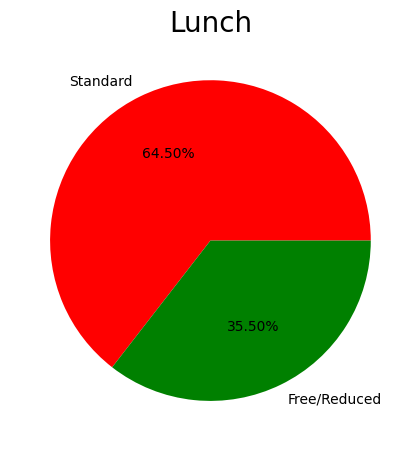

In [22]:
plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free/Reduced'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%0.02f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')


- Number of students with standard lunch are more than the other

(-1.25, 1.25, -1.25, 1.25)

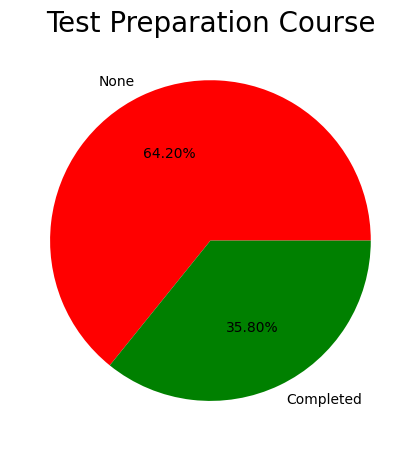

In [23]:
plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%0.02f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')


- Students who did not enroll themselves in any of the test preparation course are greater than the other

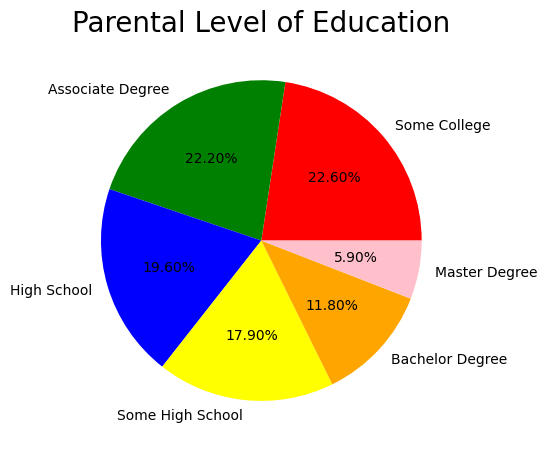

In [24]:
plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='Some College','Associate Degree','High School','Some High School','Bachelor Degree','Master Degree'
color=['red','green','blue','yellow','orange','pink']

plt.pie(size,colors=color,labels=labels,autopct='%0.02f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')
plt.show()

- Parents who have the qualifications as "Some College" are the highest followed by 'Associate Degree'.

Feature Wise Visualization

## Gender Column

Univariate Analysis to identify the distribution of the gender column

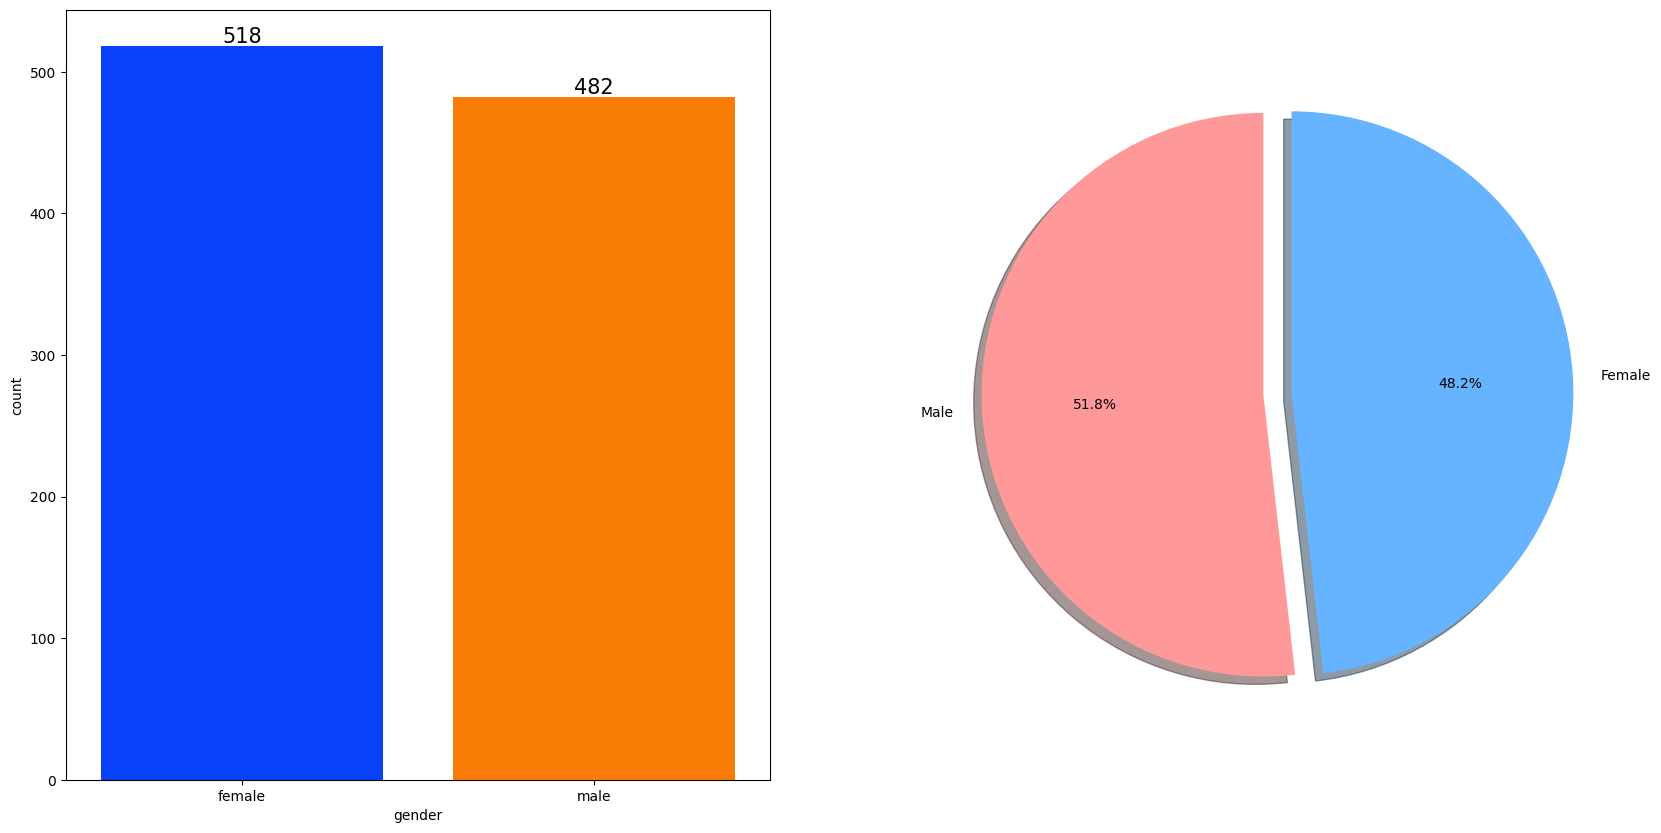

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff9999','#66b3ff'],startangle=90) 
plt.show() 

- Gender has a balanced data with female students being 518(48%) and male students being 482(52%)

Bivariate Analysis

In [31]:
numeric_df = df.select_dtypes(include=[np.number]).copy()
numeric_df['gender']=df['gender']
# Since gender is categorical variable, we need to convert it into numerical variable
gender_group=numeric_df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


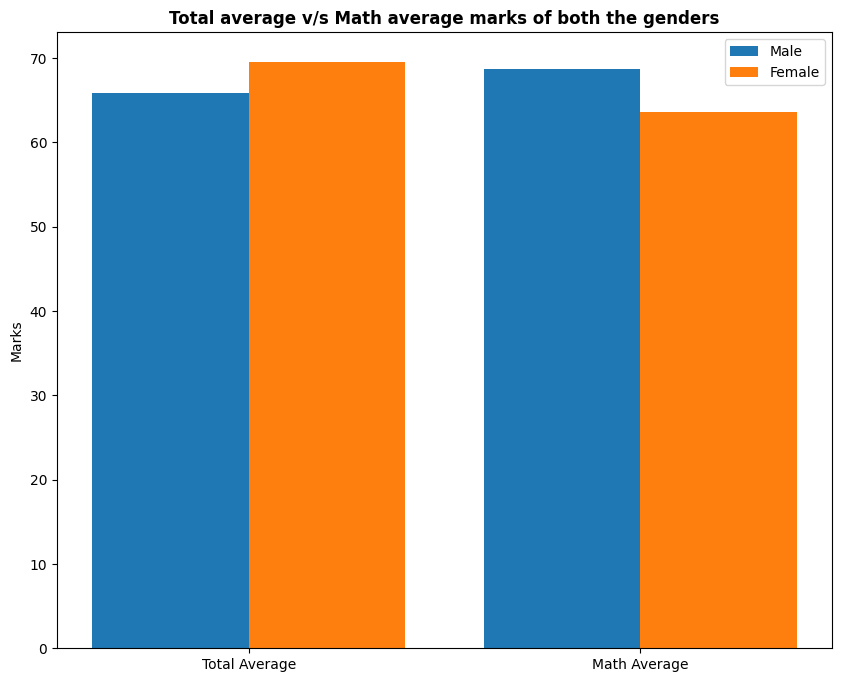

In [33]:
plt.figure(figsize=(10,8))
x=['Total Average','Math Average']

female_scores=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average_score'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(x))

plt.bar(X_axis - 0.2, male_scores,0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
plt.xticks(X_axis, x)
plt.ylabel("Marks")
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

- On an average females have a better overall score than men.
- When it comes to math subject men have performed better than women

## Race or Ethnicity Column

### Univariate Analysis

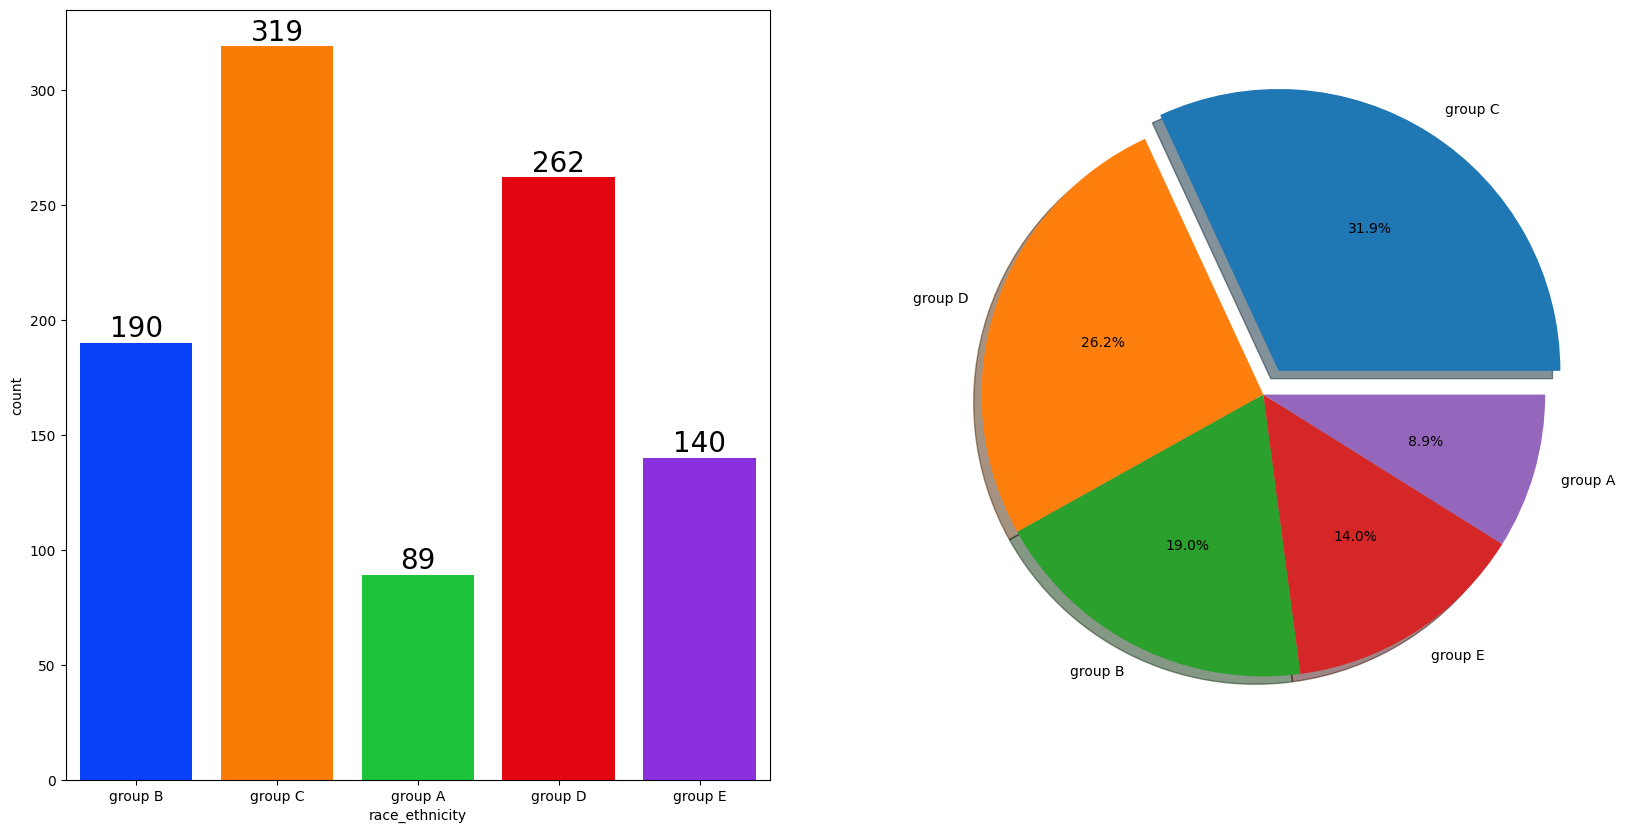

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the students belong to Group C and Group D
- Group A has lowest number of students

#### Does Race or Ethnicity have any impact on student's performance

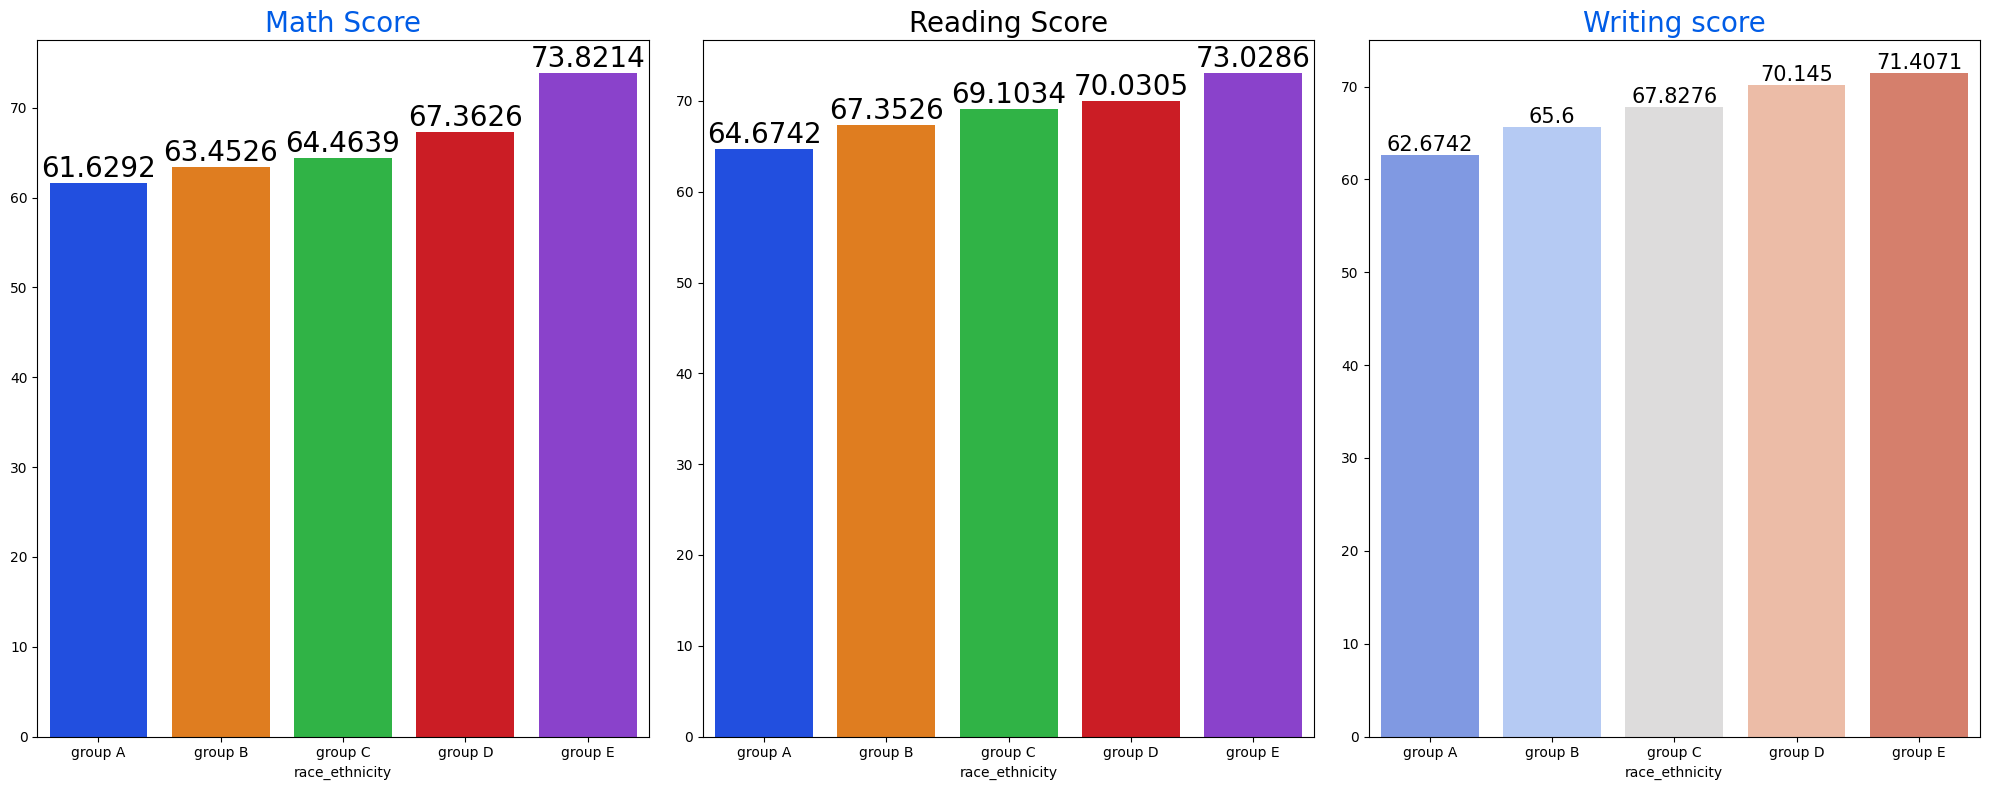

In [44]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,ax=ax[0],palette='bright')
ax[0].set_title('Math Score',color='#005ce6',fontsize=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,ax=ax[1],palette='bright')
ax[1].set_title('Reading Score',color='black',fontsize=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)


for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    
plt.tight_layout()
plt.show()
      

- Students from Group E have performed well in all the Reading, Writing and Math scores than all the other groups.
- Similarly students from Group A have performed poorly than all the other groups.

#### Parental Level of education

###### Eduational Background of student's parent

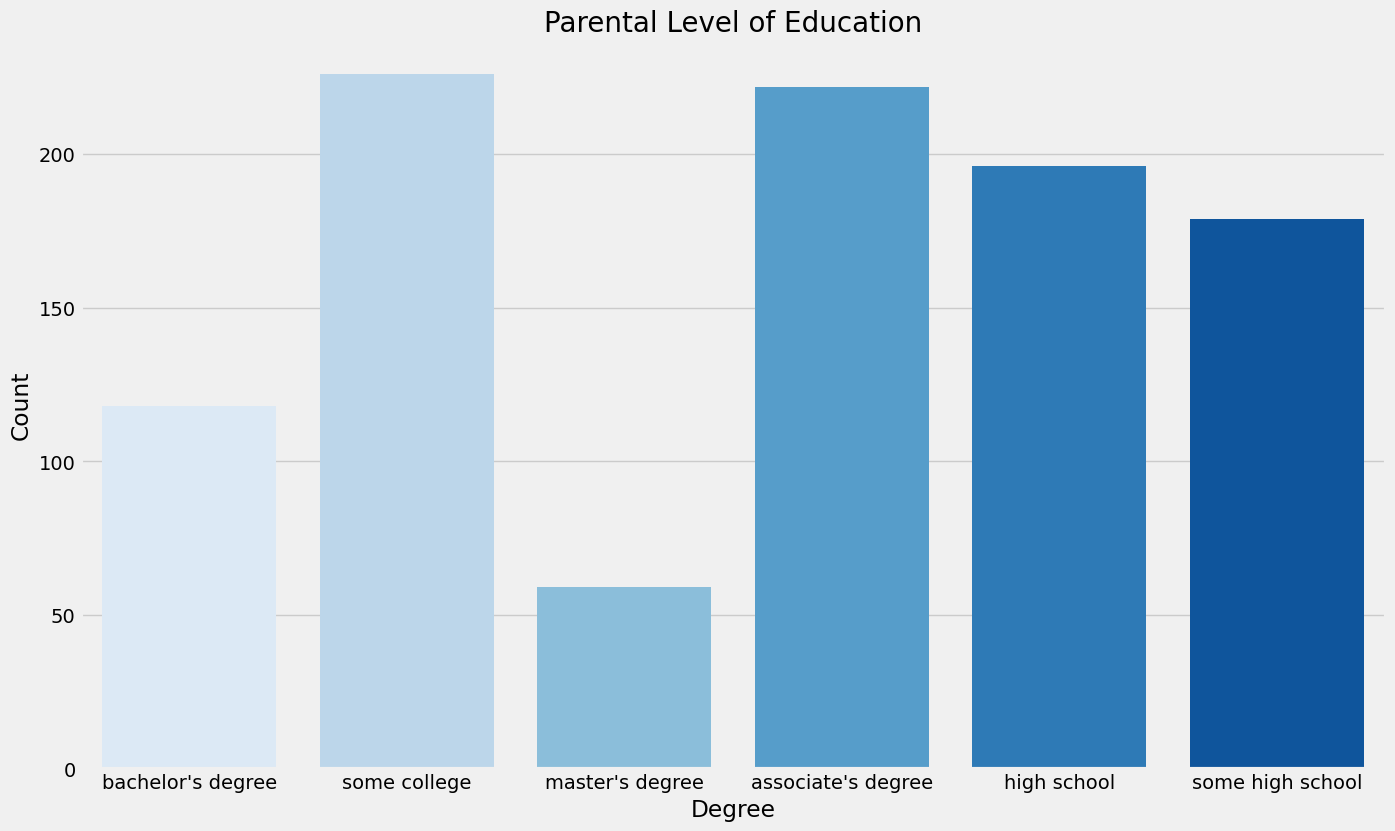

In [46]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues',saturation=0.95)
plt.title('Parental Level of Education',fontsize=20, fontweight=30)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()  

- Parents with degree from Some College are the highest.

BiVariate Analysis.                 Does Parental Education have any impact on Student's performance

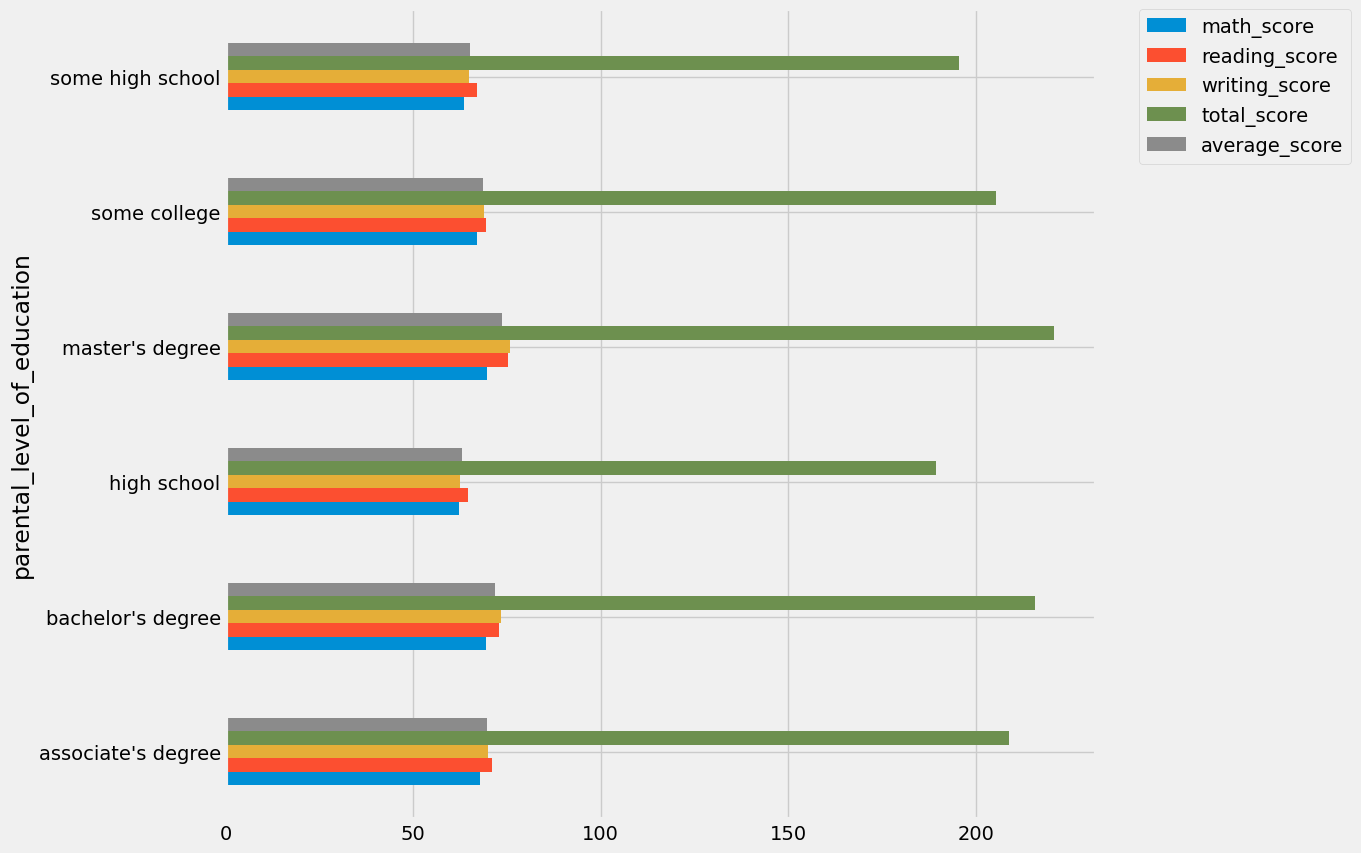

In [53]:
numeric_columns=df.select_dtypes(include=[np.number])
numeric_columns['parental_level_of_education']=df['parental_level_of_education']

mean_columns=numeric_columns.groupby('parental_level_of_education').mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- From the above graph, it can be concluded that the score of the students whose parents have either a Masters' or a Bachelors' degree are higher than the rest

Lunch Column

### Univariate Analysis

- Type of Lunch common among most students

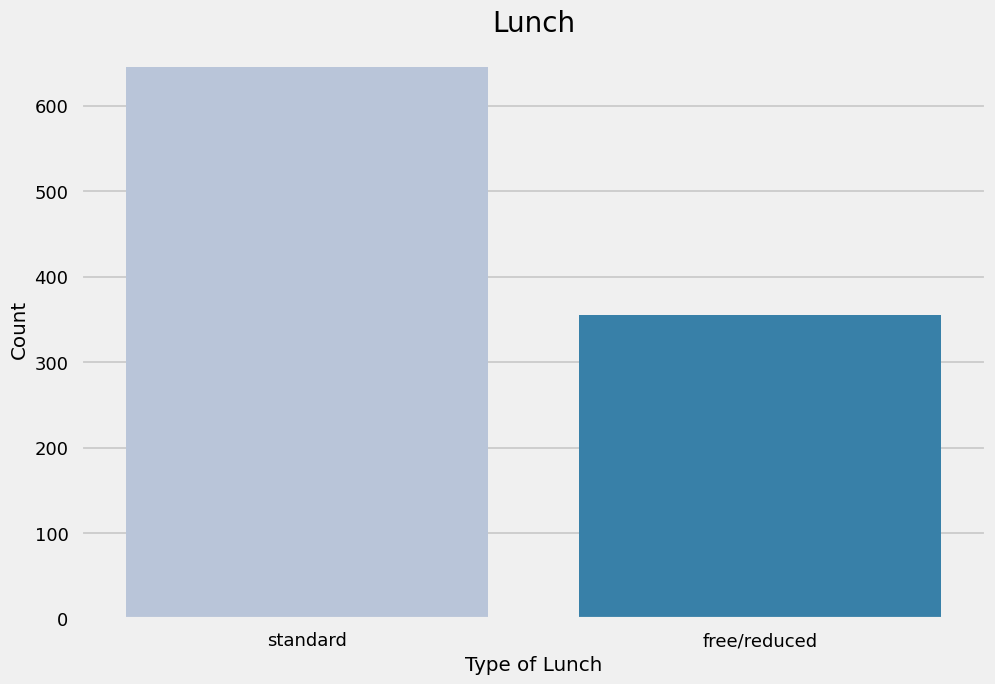

In [54]:
plt.rcParams['figure.figsize']=(15,9)   
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],palette='PuBu')
plt.title('Lunch',fontsize=20, fontweight=30)
plt.xlabel('Type of Lunch')
plt.ylabel('Count')
plt.show()


- Students who opt for Standard Lunch are higher than the students who opt for Free or Reduced type of lunch

- Does the Lunch type have any impact on student's performance

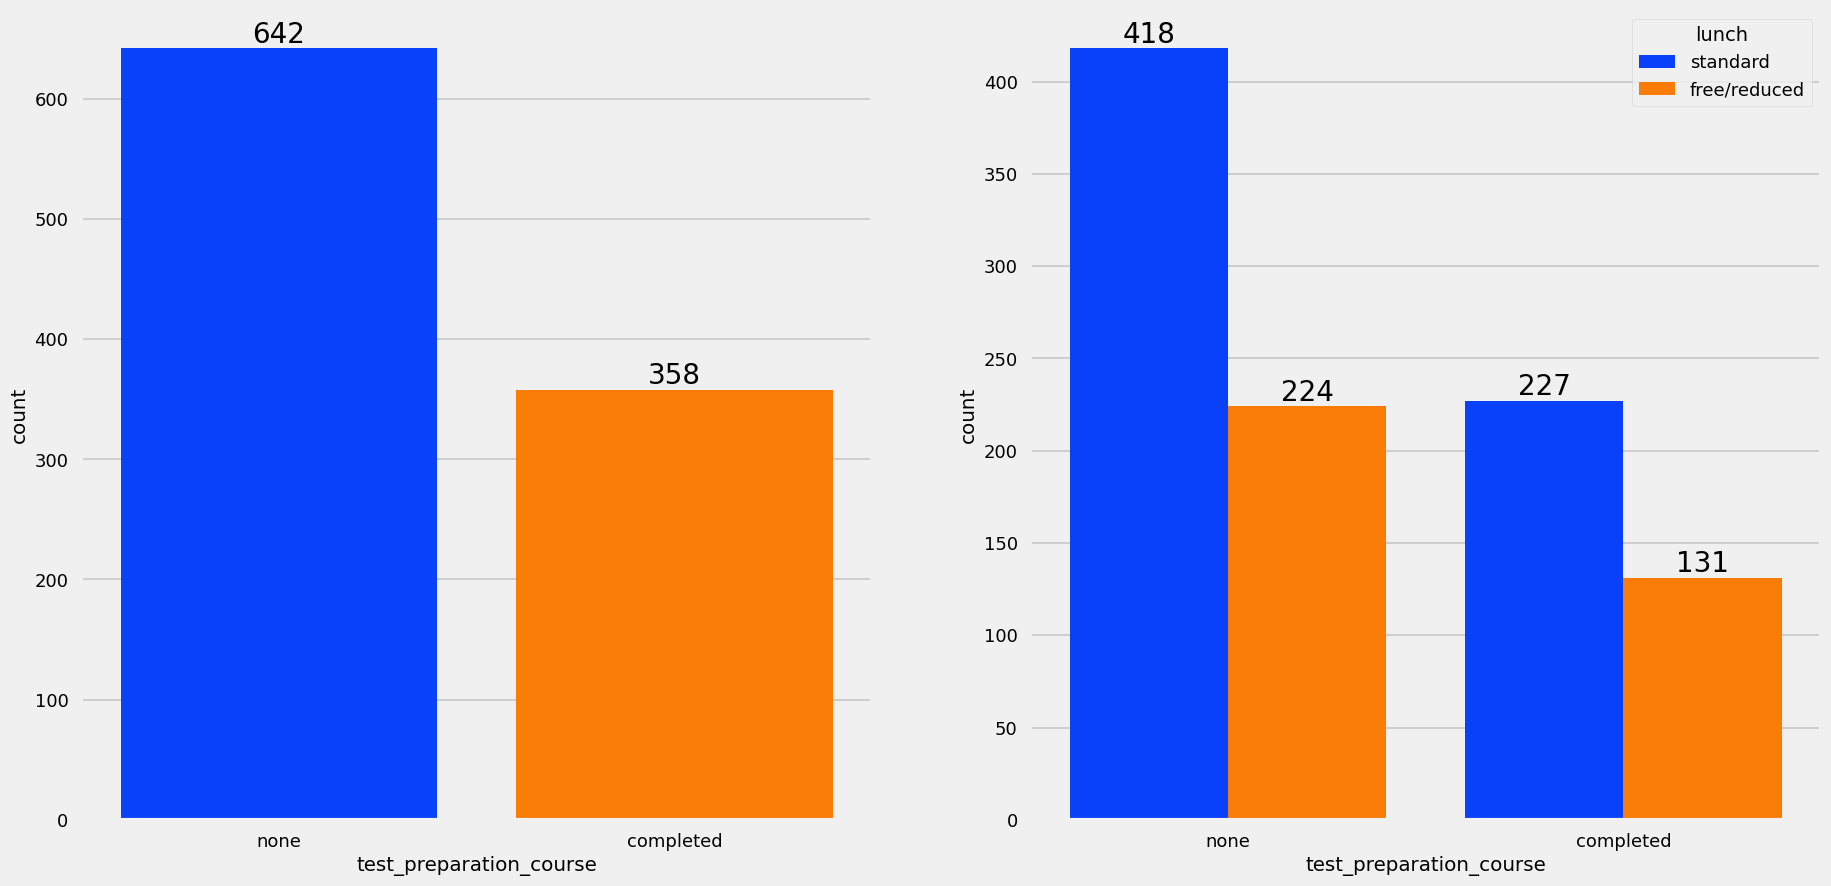

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))  
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',hue='test_preparation_course',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
    

- Students with Standard Lunch have performed better in tests than students who got free or reduced lunch.

## Test Preparation Column

#### BiVariate Analysis

- Does Test Preapration Course have any impact on Student's performance

<Axes: xlabel='lunch', ylabel='writing_score'>

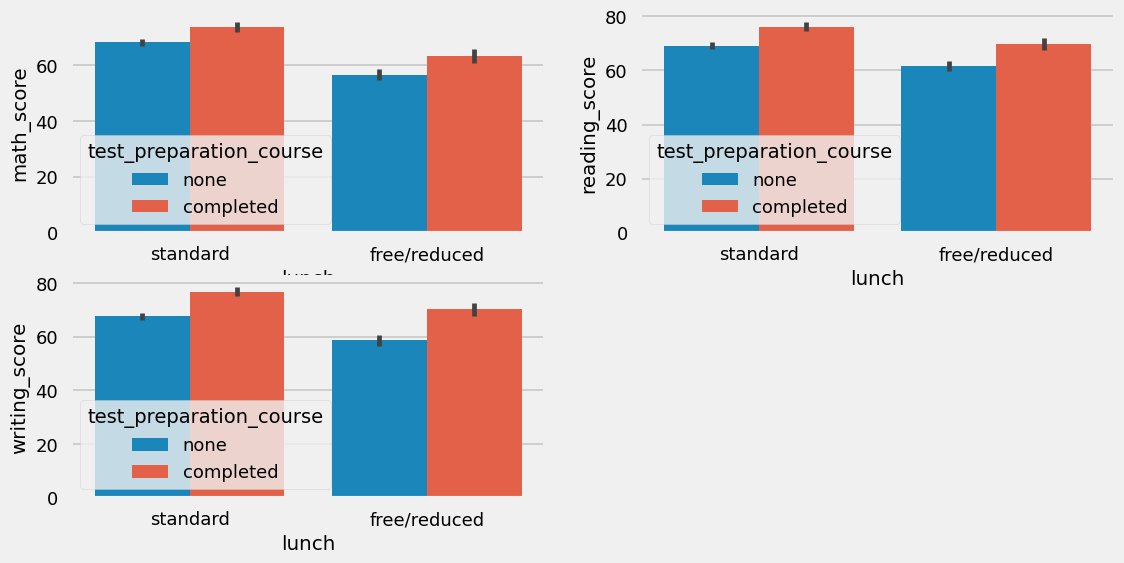

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

- In all of tests, students with Standard Lunch have outperformed the students with Free or Reduced Lunch
- Lunch does have a significant effect on a student's performance.

## Checking Outliers

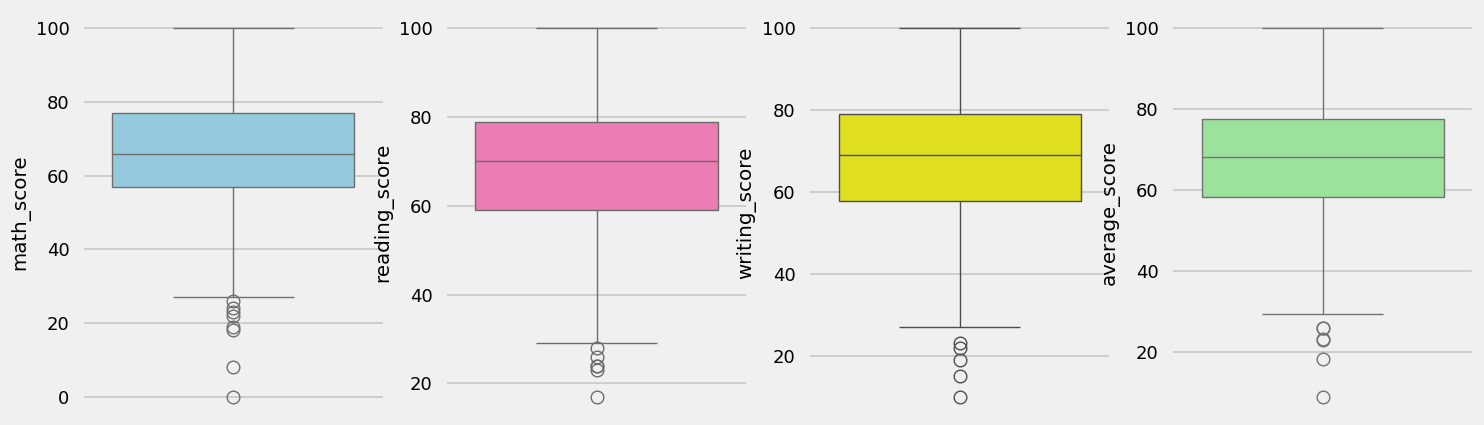

In [58]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

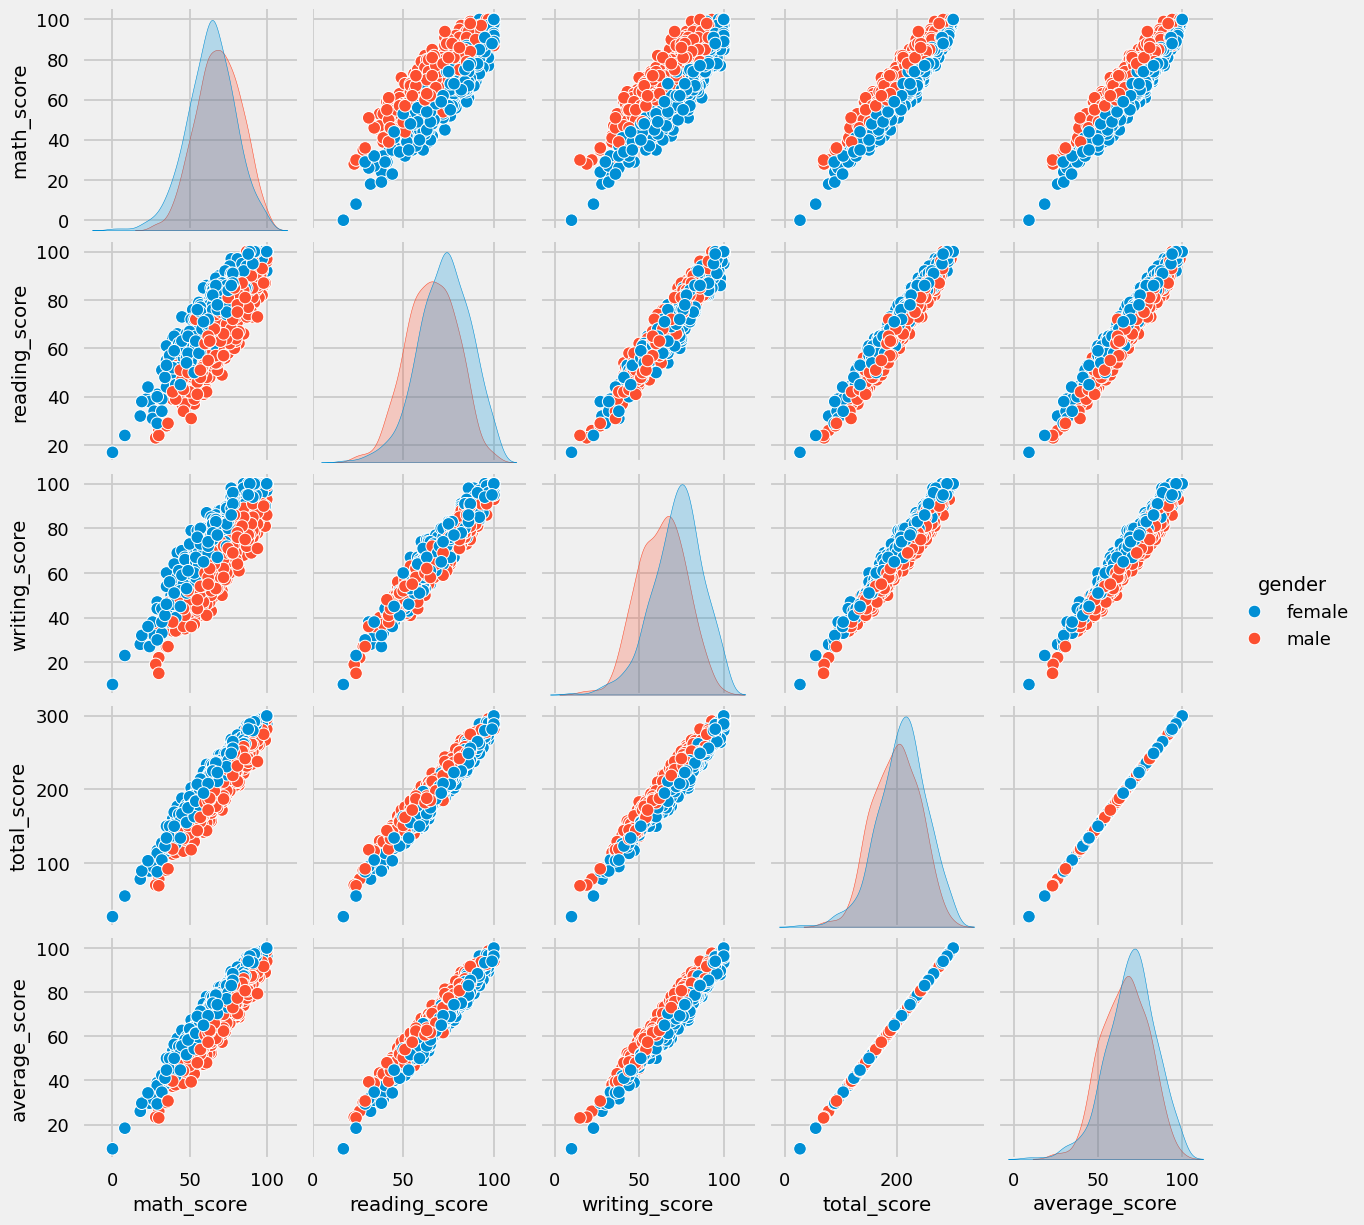

In [59]:
sns.pairplot(df,hue='gender')
plt.show()

- Graphs shows that the scores are increasing linearly with each other.


### Conclusions

From the EDA, we can make the following Conclusions:
- Student's performance in a test is related to the type of lunch and parental education.
- The passing percentage of female students is higher than the male students, and also the female students are top-scorers.
- Test preapration course does not have an effect on student's performance.
- Students who have completed the course are benefitted in the exams. 